In [1]:
#Facebook Stock Prediction Using and SVR

In [2]:
#import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
#load the data
df= yf.Ticker('META').history(start='2019-05-2',end='2019-06-1')
df=df.reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-01,194.779999,196.179993,193.009995,193.029999,15996600,0,0
1,2019-05-02,193.000000,194.000000,189.750000,192.529999,13209500,0,0
2,2019-05-03,194.380005,196.160004,193.710007,195.470001,14575400,0,0
3,2019-05-06,191.240005,194.279999,190.550003,193.880005,13994900,0,0
4,2019-05-07,192.539993,192.899994,187.850006,189.770004,16253000,0,0
5,2019-05-08,189.389999,190.720001,188.550003,189.539993,12505700,0,0
6,2019-05-09,187.199997,189.770004,186.259995,188.649994,12967000,0,0
7,2019-05-10,188.250000,190.000000,184.589996,188.339996,12578500,0,0
8,2019-05-13,183.500000,185.429993,180.839996,181.539993,16833300,0,0
9,2019-05-14,182.520004,183.490005,178.100006,180.729996,17628100,0,0


In [4]:
actual_price=df.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
21,2019-05-31,180.279999,180.539993,177.160004,177.470001,15226500,0,0


In [5]:
#prepare the data for training the SVR Models
#Get all of the data except for the last row
df=df.head(len(df)-1)
#Print the new data set
print(df)

         Date        Open        High         Low       Close    Volume  \
0  2019-05-01  194.779999  196.179993  193.009995  193.029999  15996600   
1  2019-05-02  193.000000  194.000000  189.750000  192.529999  13209500   
2  2019-05-03  194.380005  196.160004  193.710007  195.470001  14575400   
3  2019-05-06  191.240005  194.279999  190.550003  193.880005  13994900   
4  2019-05-07  192.539993  192.899994  187.850006  189.770004  16253000   
5  2019-05-08  189.389999  190.720001  188.550003  189.539993  12505700   
6  2019-05-09  187.199997  189.770004  186.259995  188.649994  12967000   
7  2019-05-10  188.250000  190.000000  184.589996  188.339996  12578500   
8  2019-05-13  183.500000  185.429993  180.839996  181.539993  16833300   
9  2019-05-14  182.520004  183.490005  178.100006  180.729996  17628100   
10 2019-05-15  180.419998  187.279999  180.020004  186.270004  16746900   
11 2019-05-16  185.050003  188.580002  185.050003  186.990005  12953100   
12 2019-05-17  184.839996

In [6]:
#create empty lists to store the independent and dependent data
days=list()
close=list()

In [7]:
#Get the date and close prices
df_days=df.loc[:,'Date']
df_days=df_days[:-4]
df_close=df.loc[:,'Close']
df_close=df_close[:-4]
df_days,df_close

(0    2019-05-01
 1    2019-05-02
 2    2019-05-03
 3    2019-05-06
 4    2019-05-07
 5    2019-05-08
 6    2019-05-09
 7    2019-05-10
 8    2019-05-13
 9    2019-05-14
 10   2019-05-15
 11   2019-05-16
 12   2019-05-17
 13   2019-05-20
 14   2019-05-21
 15   2019-05-22
 16   2019-05-23
 Name: Date, dtype: datetime64[ns],
 0     193.029999
 1     192.529999
 2     195.470001
 3     193.880005
 4     189.770004
 5     189.539993
 6     188.649994
 7     188.339996
 8     181.539993
 9     180.729996
 10    186.270004
 11    186.990005
 12    185.300003
 13    182.720001
 14    184.820007
 15    185.320007
 16    180.869995
 Name: Close, dtype: float64)

In [8]:
#create the independent data set
for day in df_days:
    day=str(day)
    days.append([int((day.split('-')[2]).split(' ')[0])])
    
#create the dependent data set
for Close in df_close:
    close.append(float(Close))

days,close

([[1],
  [2],
  [3],
  [6],
  [7],
  [8],
  [9],
  [10],
  [13],
  [14],
  [15],
  [16],
  [17],
  [20],
  [21],
  [22],
  [23]],
 [193.02999877929688,
  192.52999877929688,
  195.47000122070312,
  193.8800048828125,
  189.77000427246094,
  189.5399932861328,
  188.64999389648438,
  188.33999633789062,
  181.5399932861328,
  180.72999572753906,
  186.27000427246094,
  186.99000549316406,
  185.3000030517578,
  182.72000122070312,
  184.82000732421875,
  185.32000732421875,
  180.8699951171875])

In [9]:
#Create the 3 Support Vector Regression Models

#create and train a SVR Model Using Linear kernel
lin_svr=SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,close)

#create and train a SVR Model Using a polynomial kernel
poly_svr=SVR(kernel='poly',C=1000.0,degree=2)
poly_svr.fit(days,close)

#create and train a SVR Model Using a rbf kernel
rbf_svr=SVR(kernel='rbf',C=1000.0,gamma=0.00028)
rbf_svr.fit(days,close)

SVR(C=1000.0, gamma=0.00028)

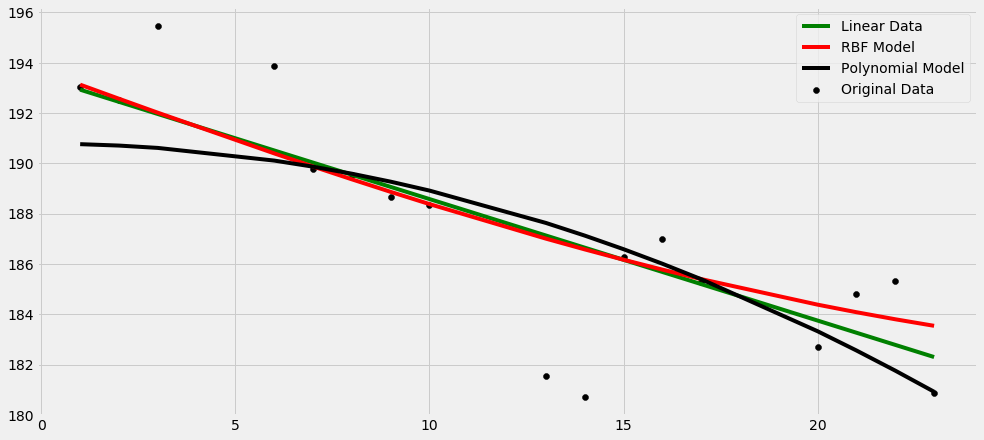

In [10]:
#plot the model o0 a graph to see which has the best fit ti the original data
plt.figure(figsize=(15,7))
plt.scatter(days,close,color='black',label='Original Data')
plt.plot(days,lin_svr.predict(days),color='green',label='Linear Data')
plt.plot(days,rbf_svr.predict(days),color='red',label='RBF Model')
plt.plot(days,poly_svr.predict(days),color='K',label='Polynomial Model')
plt.legend()
plt.show()

In [11]:
#Get the date and close prices
df_days=df.loc[:,'Date']
test_df_days=df_days[-4:]
df_close=df.loc[:,'Close']
test_df_close=df_close[-4:]
test_df_days,test_df_close

(17   2019-05-24
 18   2019-05-28
 19   2019-05-29
 20   2019-05-30
 Name: Date, dtype: datetime64[ns],
 17    181.059998
 18    184.309998
 19    182.190002
 20    183.009995
 Name: Close, dtype: float64)

In [12]:
#create empty lists to store the independent and dependent data
Test_days=list()
Test_close=list()

In [13]:
#create the independent data set
for day in test_df_days:
    day=str(day)
    Test_days.append([int((day.split('-')[2]).split(' ')[0])])
    
#create the dependent data set
for Close in test_df_close:
    Test_close.append(float(Close))

Test_days,test_df_days

([[24], [28], [29], [30]],
 17   2019-05-24
 18   2019-05-28
 19   2019-05-29
 20   2019-05-30
 Name: Date, dtype: datetime64[ns])

In [14]:
#create empty lists to store the independent and dependent data
Total_days=list()
Total_close=list()


In [15]:
df_days=df.loc[:,'Date']
df_close=df.loc[:,'Close']
df_days,df_close

(0    2019-05-01
 1    2019-05-02
 2    2019-05-03
 3    2019-05-06
 4    2019-05-07
 5    2019-05-08
 6    2019-05-09
 7    2019-05-10
 8    2019-05-13
 9    2019-05-14
 10   2019-05-15
 11   2019-05-16
 12   2019-05-17
 13   2019-05-20
 14   2019-05-21
 15   2019-05-22
 16   2019-05-23
 17   2019-05-24
 18   2019-05-28
 19   2019-05-29
 20   2019-05-30
 Name: Date, dtype: datetime64[ns],
 0     193.029999
 1     192.529999
 2     195.470001
 3     193.880005
 4     189.770004
 5     189.539993
 6     188.649994
 7     188.339996
 8     181.539993
 9     180.729996
 10    186.270004
 11    186.990005
 12    185.300003
 13    182.720001
 14    184.820007
 15    185.320007
 16    180.869995
 17    181.059998
 18    184.309998
 19    182.190002
 20    183.009995
 Name: Close, dtype: float64)

In [16]:
#create the independent data set
for day in df_days:
    day=str(day)
    Total_days.append([int((day.split('-')[2]).split(' ')[0])])
    
#create the dependent data set
for Close in df_close:
    Total_close.append(float(Close))

Total_days,Total_close

([[1],
  [2],
  [3],
  [6],
  [7],
  [8],
  [9],
  [10],
  [13],
  [14],
  [15],
  [16],
  [17],
  [20],
  [21],
  [22],
  [23],
  [24],
  [28],
  [29],
  [30]],
 [193.02999877929688,
  192.52999877929688,
  195.47000122070312,
  193.8800048828125,
  189.77000427246094,
  189.5399932861328,
  188.64999389648438,
  188.33999633789062,
  181.5399932861328,
  180.72999572753906,
  186.27000427246094,
  186.99000549316406,
  185.3000030517578,
  182.72000122070312,
  184.82000732421875,
  185.32000732421875,
  180.8699951171875,
  181.05999755859375,
  184.30999755859375,
  182.19000244140625,
  183.00999450683594])

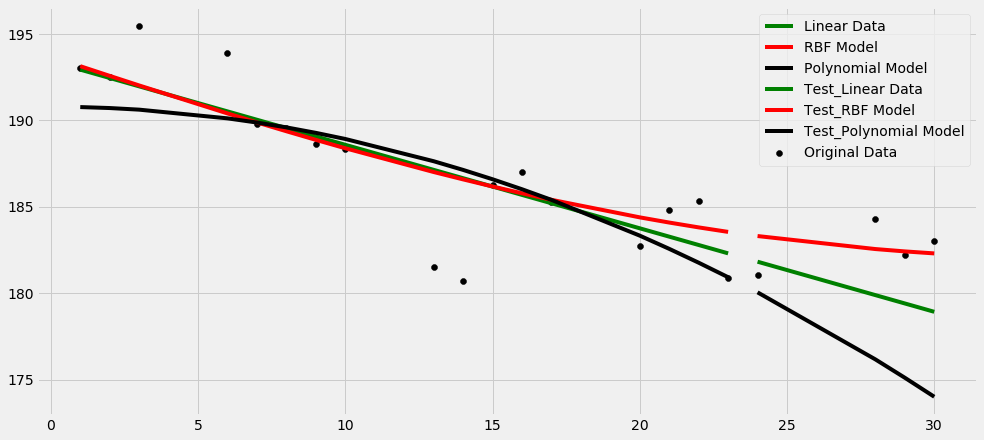

In [17]:
#plot the model o0 a graph to see which has the best fit ti the original data
plt.figure(figsize=(15,7))
plt.scatter(Total_days,Total_close,color='black',label='Original Data')
plt.plot(days,lin_svr.predict(days),color='green',label='Linear Data')
plt.plot(days,rbf_svr.predict(days),color='red',label='RBF Model')
plt.plot(days,poly_svr.predict(days),color='K',label='Polynomial Model')
plt.plot(Test_days,lin_svr.predict(Test_days),color='green',label='Test_Linear Data')
plt.plot(Test_days,rbf_svr.predict(Test_days),color='red',label='Test_RBF Model')
plt.plot(Test_days,poly_svr.predict(Test_days),color='K',label='Test_Polynomial Model')
plt.legend()
plt.show()